### Import libraries and dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

#import for Wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

df = pd.read_csv('Dataset_(Jia Yang).csv', parse_dates=["Date"], encoding='latin1')

### Dataset cleaning:

In [2]:
#Replace for NaN values with Unknown
df.fillna('Unknown', inplace=True)

#Delete un-used columns
df = df.drop(['Title','Response','Sources_1','Sources_2', 'Sources_3', 'Affiliations', 'Victims'], axis=1)

#Removing non-relevant records/rows
df.drop([87,130,142,148,173,186,216,285,286,287,315,372,385,458],0,inplace=True)

#Set year as index
df['Year']= df['Date'].dt.year
df['Month']= df['Date'].dt.month

#Split 'Category' Column by commas
df['Category'] = df['Category'].str.lower() #lower all str
df['Category'] = df['Category'].str.split(',') #split str by commas 

### Data Visualization:

#### World CyberAttack Trend from 2005 to 2020:
 Total 445 incidents reported throughout the 15 years. There was a increase of 80% in CyberAttacks since 2005.

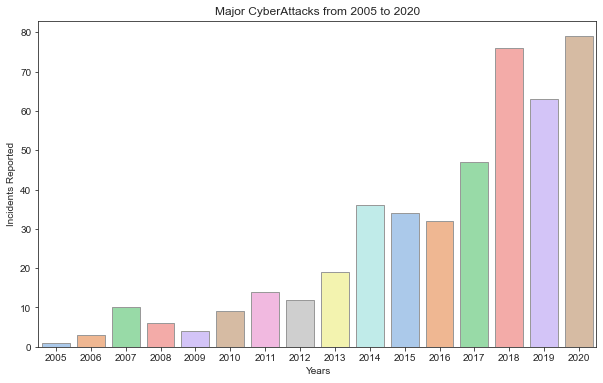

<Figure size 432x288 with 0 Axes>

In [3]:
#set graph style
sns.set_style('ticks') 

#set graph size
fig, ax = plt.subplots(figsize=(10,6)) 

#set graph parameters & customize design
sns.countplot(x="Year", data=df, palette="pastel", edgecolor=".6") 

#set graph labels & title.
ax.set(title='Major CyberAttacks from 2005 to 2020', xlabel='Years', ylabel='Incidents Reported') 

plt.show() 
plt.savefig('1-Major_CyberAttacks_from_2005_to_2020.png')

#### CyberAttack in Economy Sector
Total 4 major economy sector identified - Private, Goverment(Public), Civil Society & Miliary.
Majority attacks(75%) targeted on Private & Goverment sectors 

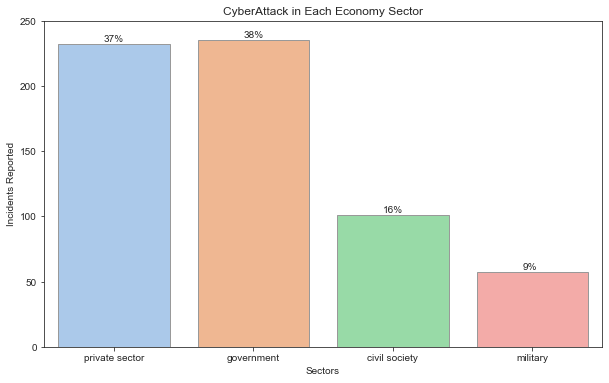

<Figure size 432x288 with 0 Axes>

In [4]:
#duplicate the list in the row by the category
df2 = df.explode("Category") 

 # \remove any space from the duplicated row
df2["Category"] = df2["Category"].str.strip()

# set graph style
sns.set_style('ticks') 

# set graph set
fig, ax = plt.subplots(figsize=(10,6)) 

#set graph parameters & customize design
sns.countplot( x="Category" , data=df2, edgecolor=".6", palette="pastel")

#set graph labels & title.
ax.set(title='CyberAttack in Each Economy Sector', xlabel='Sectors', ylabel='Incidents Reported')

#set the y-axis limit
ax.set(ylim=(0, 250)) 

#include percentage annotation to each category
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/625)
    ax.annotate(percentage.format(p.get_height()), (p.get_x()+0.33, p.get_height()+2))

plt.show() 
plt.savefig('2-CyberAttack_in_Each_Economy_Sector.png')

#### CyberAttack Trend to Each Economy Sectors from 2005 to 2020
Government and Private sector saw increase in trend for the past 15 years

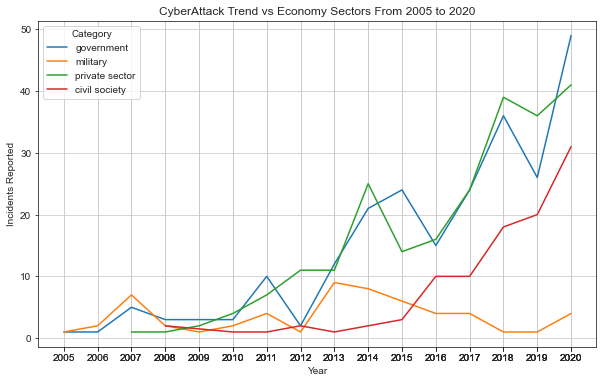

<Figure size 432x288 with 0 Axes>

In [5]:
df2['Count'] = 1 #include new column for counter = 1

df3 = df2.groupby(["Year","Category"]).sum("Count").reset_index() #Group df2 by Year and Category   

sns.set_style('ticks') #set graph Style 

fig, ax = plt.subplots(figsize=(10,6)) #set graph Size
plt.grid()

sns.lineplot(x = "Year" , y = "Count" , data = df3, hue = "Category") #set graph parameters & customize design

ax.set(xticks=df3.Year.values) #show all years in x-axis 

ax.set(title='CyberAttack Trend vs Economy Sectors From 2005 to 2020', xlabel='Year', ylabel='Incidents Reported')
#set graph labels & title.

plt.show() 
plt.savefig('3-CyberAttack_Trend_vs_Economy_Sectors_From_2005_to_2020.png')


#### Weightage of CyberAttack VS  Ecomony Sector from 2005 to 2020
CyberAttack in each sector by year, attacks to the private & goverment sectors appeared in the past 15years

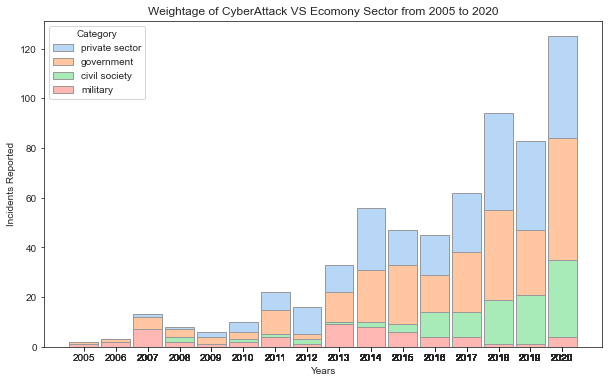

<Figure size 432x288 with 0 Axes>

In [6]:
#set graph style
sns.set_style('ticks') 

#set graph size
fig, ax = plt.subplots(figsize=(10,6)) 

#set graph parameters and customize design
ax = sns.histplot(data=df2, x='Year', hue='Category',
             multiple='stack', shrink=0.9, discrete=True, edgecolor=".6", palette="pastel") 

#show all years in x-axis 
ax.set(xticks=df2.Year.values) 

#set graph labels & title.
ax.set(title='Weightage of CyberAttack VS Ecomony Sector from 2005 to 2020',
            xlabel='Years', ylabel='Incidents Reported')

plt.show() 
plt.savefig('4-Weightage_of_CyberAttack_VS_Ecomony_Sector_From_2005_to_2020.png')

#### Types of CyberAttack
88% of the CyberAttack objective found to be Espionage then rest of the type.

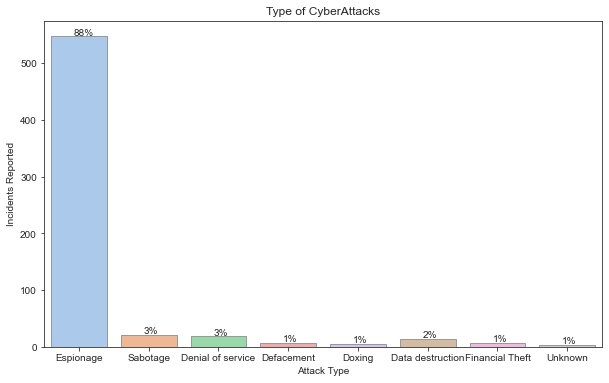

<Figure size 432x288 with 0 Axes>

In [7]:
#set graph style
sns.set_style('ticks') 

#set graph size
fig, ax = plt.subplots(figsize=(10,6)) 

#set parameters & customize design
sns.countplot( x="Type" , data=df2, palette="pastel", edgecolor=".6")

#set graph labels & title
ax.set(title='Type of CyberAttacks', xlabel='Attack Type', ylabel='Incidents Reported')

#include percentage annotation to each category
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/625)
    ax.annotate(percentage.format(p.get_height()), (p.get_x()+0.33, p.get_height()+2))

plt.show() 
plt.savefig('5-Type_of_CyberAttacks.png')

#### Weightage of Each CyberAttack Type from 2005 to 2020
Majority Espionage type of cyberAttack found throughout 2005 to 2020

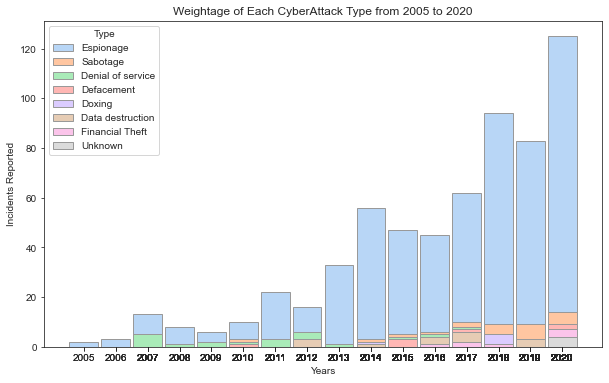

<Figure size 432x288 with 0 Axes>

In [8]:
#set graph style
sns.set_style('ticks') 

# set graph size
fig, ax = plt.subplots(figsize=(10,6)) 

#set parameters & customize design
ax = sns.histplot(data=df2, x='Year', hue='Type',
             multiple='stack', shrink=0.9, discrete=True, edgecolor=".6", palette="pastel")

#show all years in x-axis 
ax.set(xticks=df2.Year.values) 

#set graph labels & title
ax.set(title='Weightage of Each CyberAttack Type from 2005 to 2020', xlabel='Years', ylabel='Incidents Reported')

plt.show() 
plt.savefig('6-Weightage_of_Each_CyberAttack_Type_from_2005_to_2020.png')

#### CyberAttack Types VS Economy Sectors
Majority of the cyberAttack type found to be Espionage throughout all the Economy Sectors.

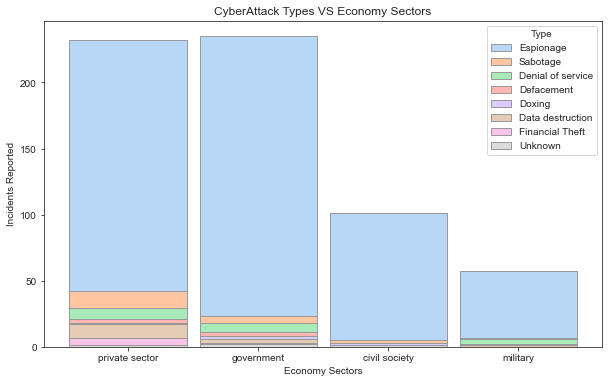

<Figure size 432x288 with 0 Axes>

In [9]:
#set graph style
sns.set_style('ticks')


#set graph size
fig, ax = plt.subplots(figsize=(10,6)) 

#set parameters & customize design
ax = sns.histplot(data=df2, x='Category', hue='Type', multiple='stack', 
                  shrink=0.9, discrete=True, edgecolor=".6", palette="pastel")

#set graph labels & title.
ax.set(title='CyberAttack Types VS Economy Sectors', xlabel='Economy Sectors', ylabel='Incidents Reported')

plt.show() 
plt.savefig('7-CyberAttack_Types_VS_Economy_Sectors.png')

##### CyberAttack Incidents Frequency Per Month
Average 38 cyberattacks found throughout the months in a year. Feb, Apr & Jul found below average.

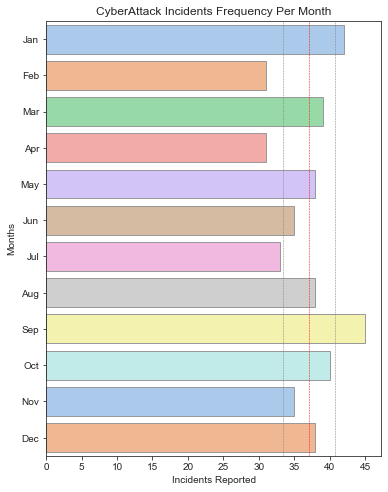

<Figure size 432x288 with 0 Axes>

In [10]:
#include new column for month
df["Month_Name"] = df['Date'].dt.month_name().str.slice(stop=3) 
df3 = df

#sort records by months
df3 = df3.sort_values("Month") 


#caculate the average of attack per month
df3["Count"] = 1
mean = df3.Count.sum()/12 
below_mean = mean*0.9
above_mean = mean*1.1

#set graph style
sns.set_style('ticks') 

#set graph size
fig, ax = plt.subplots(figsize=(6,8)) 

#set parameters & customize design
ax = sns.countplot(data=df3, y='Month_Name',edgecolor=".6", palette="pastel")

#set x-axis range
ax.set_xticks(np.arange(0,46,5)) 

#draw mean line to plot
ax.axvline(mean, color='r', linestyle='--',linewidth=0.5) 
ax.axvline(below_mean, color='grey', linestyle='--', linewidth=0.5) 
ax.axvline(above_mean, color='grey', linestyle='--', linewidth=0.5) 

#set graph labels & title.
ax.set(title='CyberAttack Incidents Frequency Per Month', xlabel='Incidents Reported', ylabel='Months')

plt.show() 
plt.savefig('8-CyberAttack_Incidents_Frequency_Per_Month.png')

In [11]:
#lowercase all str in Victim_Countires column
df2["Victim_Countries"] = df2["Victim_Countries"].astype(str).str.lower()

#split str by commas into list
df2["Victim_Countries"] = df2["Victim_Countries"].astype(str).str.split(',')

#duplicate rows by each countries
df4 = df2.explode("Victim_Countries").reset_index()

#remove left space from the str
df4["Victim_Countries"] = df4["Victim_Countries"].astype(str).str.lstrip()

#### Country VS no. of CyberAttacks
80% of the Cyberattacks targeted United States, United Kingdom & China. 

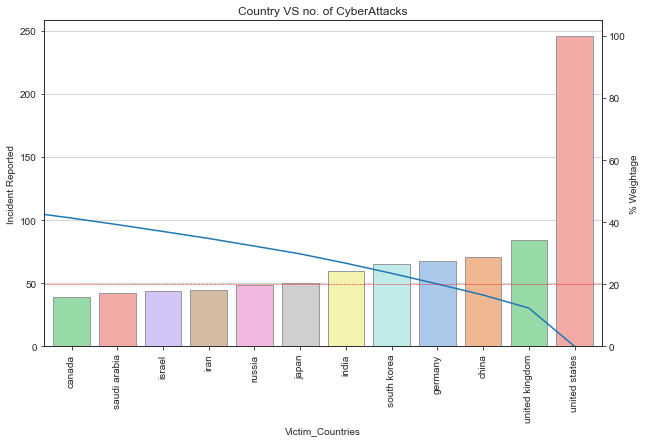

<Figure size 432x288 with 0 Axes>

In [12]:
#group records by Category & Victim Countries 
df5 = df4.groupby(["Category","Victim_Countries"]).count()

#Sum incident count for each Victim Countries
df6 = df5.groupby("Victim_Countries").sum() 

#Sort dataset according to number of count.
df6 = df6.sort_values("Count").reset_index() 

#Calculate percentage of a record to total records
df6["Weightage"] = (df6.Count / df6.Count.sum())*100 
df6["Cum_Weight"]= 100 - (df6["Weightage"].cumsum())

#set graph style
sns.set_style('ticks')

#set graph size
fig, ax1 = plt.subplots(figsize=(10,6))
plt.grid()

#set parameters & customize design of 1st plot
sns.barplot(y="Count", x="Victim_Countries", data=df6, palette="pastel", edgecolor=".6", ax=ax1)

#create 2nd plot to the 1st plot
ax2 = ax1.twinx()

#set parameters & customize design of 2nd plot
sns.lineplot(x="Victim_Countries", y="Cum_Weight", data=df6, palette="pastel", ax=ax2)
ax2.set_xlim(161.4,173.6)
ax2.set_ylim(0,105)
plt.setp(ax1.get_xticklabels(), rotation=90)

#draw line to plot to show 20% mark
ax2.axhline(20, ls='--' ,color="r",linewidth=0.5)

#set graph labels & title.
ax1.set(ylabel='Incident Reported')
ax2.set(title='Country VS no. of CyberAttacks', xlabel='Countries', ylabel='% Weightage')

plt.show() 
plt.savefig('9-Country_VS_no_of_CyberAttacks.png')

#### The Sectors Attacked in the top 80 percentile Countries
Graph show that consistence of around ~75% attacks targeted on Private and Government Sector throughout the top countries that contribute the majority of the incidents.

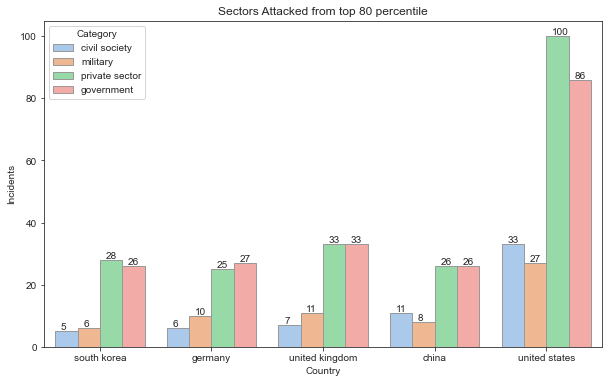

<Figure size 432x288 with 0 Axes>

In [13]:
#Group dataset by Victim_Countries and Category.
df7 = df4.groupby(["Victim_Countries","Category"]).count().reset_index()

#Sort dataset according to number of incident count
df7 = df7.sort_values(["Count"])

#show only the top 5 country records
df7 = df7.loc[(df7['Victim_Countries']=='united states') | 
              (df7['Victim_Countries']=='united kingdom') | 
              (df7['Victim_Countries']=='china') | 
              (df7['Victim_Countries']=='germany') |
              (df7['Victim_Countries']=='south korea')] 

#set graph style
sns.set_style('ticks')

#set graph size
fig, ax = plt.subplots(figsize=(10,6))

#set parameters & customize design of the graph
ax = sns.barplot(data=df7, x='Victim_Countries', y='Count', hue='Category'
                    , edgecolor=".6", palette="pastel")

#set graph labels & title.
ax.set(title='Sectors Attacked from top 80 percentile', ylabel='Incidents', xlabel='Country')

#include percentage annotation to each category
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.5))

plt.show() 
plt.savefig('10-Sectors_Attacked_from_top_80_percentile.png')

#### Top 5 CyberAttacker's Country
Graph shown that majority attacks were Espionage type from all 5 country.

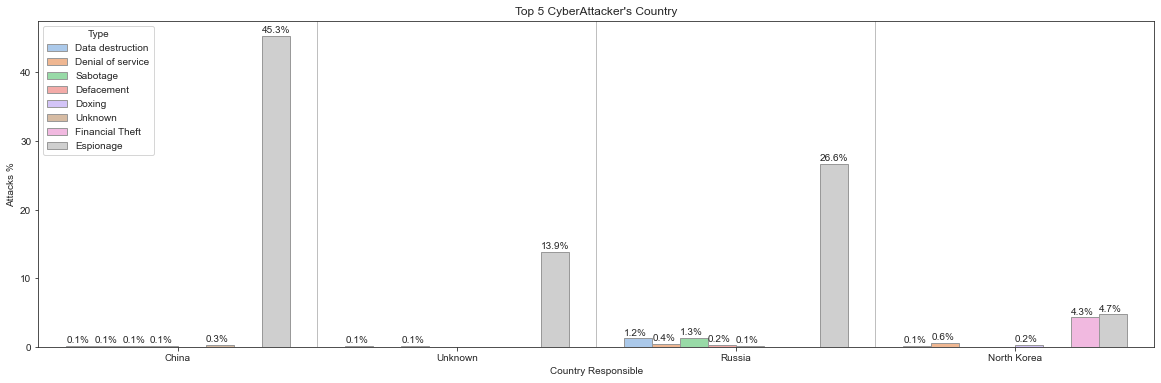

<Figure size 432x288 with 0 Axes>

In [14]:
#Group dataset by Sponsor and Type.
df8 = df4.groupby(['Sponsor','Type']).count().reset_index()

#Sort dataset according to number of incident count. Show the bottom 100records
df8 = df8.sort_values(["Count"]).tail(100)

#show only the top 5 country records
df8 = df8.loc[(df8['Sponsor']=='China') | 
              (df8['Sponsor']=='Russia') | 
              (df8['Sponsor']=='Iran') | 
              (df8['Sponsor']=='Unknown') |
              (df8['Sponsor']=='North Korea')]
               

#Calculate percentage of a record to total records
df8["Weightage"] = (df8.Count / df8.Count.sum())*100

#set graph style
sns.set_style('ticks')

#set graph size
fig, ax = plt.subplots(figsize=(20,6))

#set parameters & customize design of the graph
ax = sns.barplot(data=df8, x='Sponsor', y='Weightage', hue='Type'
                    , edgecolor=".6", palette="pastel")

#set graph labels & title.
ax.set(title="Top 5 CyberAttacker's Country", ylabel='Attacks %', xlabel='Country Responsible')

#include split line between each category
ax.axvline([0.5], color='grey', linewidth=0.5)
ax.axvline([1.5], color='grey', linewidth=0.5)
ax.axvline([2.5], color='grey', linewidth=0.5)

#include annotation for percentage of each bar plot
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/100)
    ax.annotate(percentage.format(p.get_height()), (p.get_x()+0, p.get_height()+0.5))

plt.show() 
plt.savefig("11-Top_5_CyberAttacker_Country.png")

#### Attack Frequency from the top 5 CyberAttackers from 2005 to 2020
No proper frequency pattern. Attacks from China found throughout the years

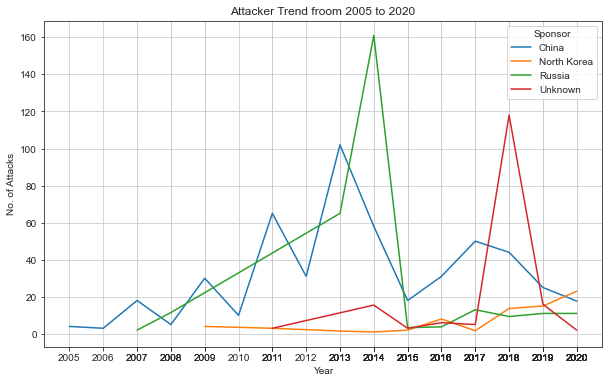

<Figure size 432x288 with 0 Axes>

In [15]:
#Group dataset by Sponsor, Type & Year
df9 = df4.groupby(['Sponsor','Type',"Year"]).count().reset_index()

#Sort dataset according to number of incident count.
df9 = df9.sort_values("Count")

#show only the top 5 country records
df9 = df9.loc[(df9['Sponsor']=='China') | 
              (df9['Sponsor']=='Russia') | 
              (df9['Sponsor']=='Iran') | 
              (df9['Sponsor']=='Unknown') |
              (df9['Sponsor']=='North Korea')]
               
#set graph style
sns.set_style('ticks')

#set graph size
fig, ax = plt.subplots(figsize=(10,6))

#set parameters & customize design of the graph
sns.lineplot(x = "Year" , y = "Count" , data = df9, hue = "Sponsor", ci= None)
plt.grid()

#show all years in x-axis 
ax.set(xticks=df9.Year.values)

#set graph labels & title.
ax.set(title='Attacker Trend froom 2005 to 2020', xlabel='Year', ylabel='No. of Attacks')

plt.show() 
plt.savefig("12-Attacker_Trend_froom_2005_to_2020.png")

#### Wordcloud On China Attack Description
can see from large words that attacks most related to stealing of data/information on defence, technology by deploying malware, phishing email and attacking through network to company/firm or military

There are 34051 words in the combination of all cells in column Description.


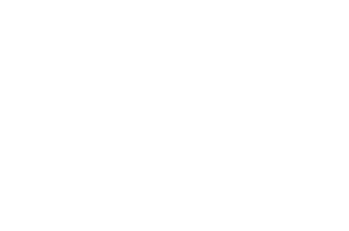

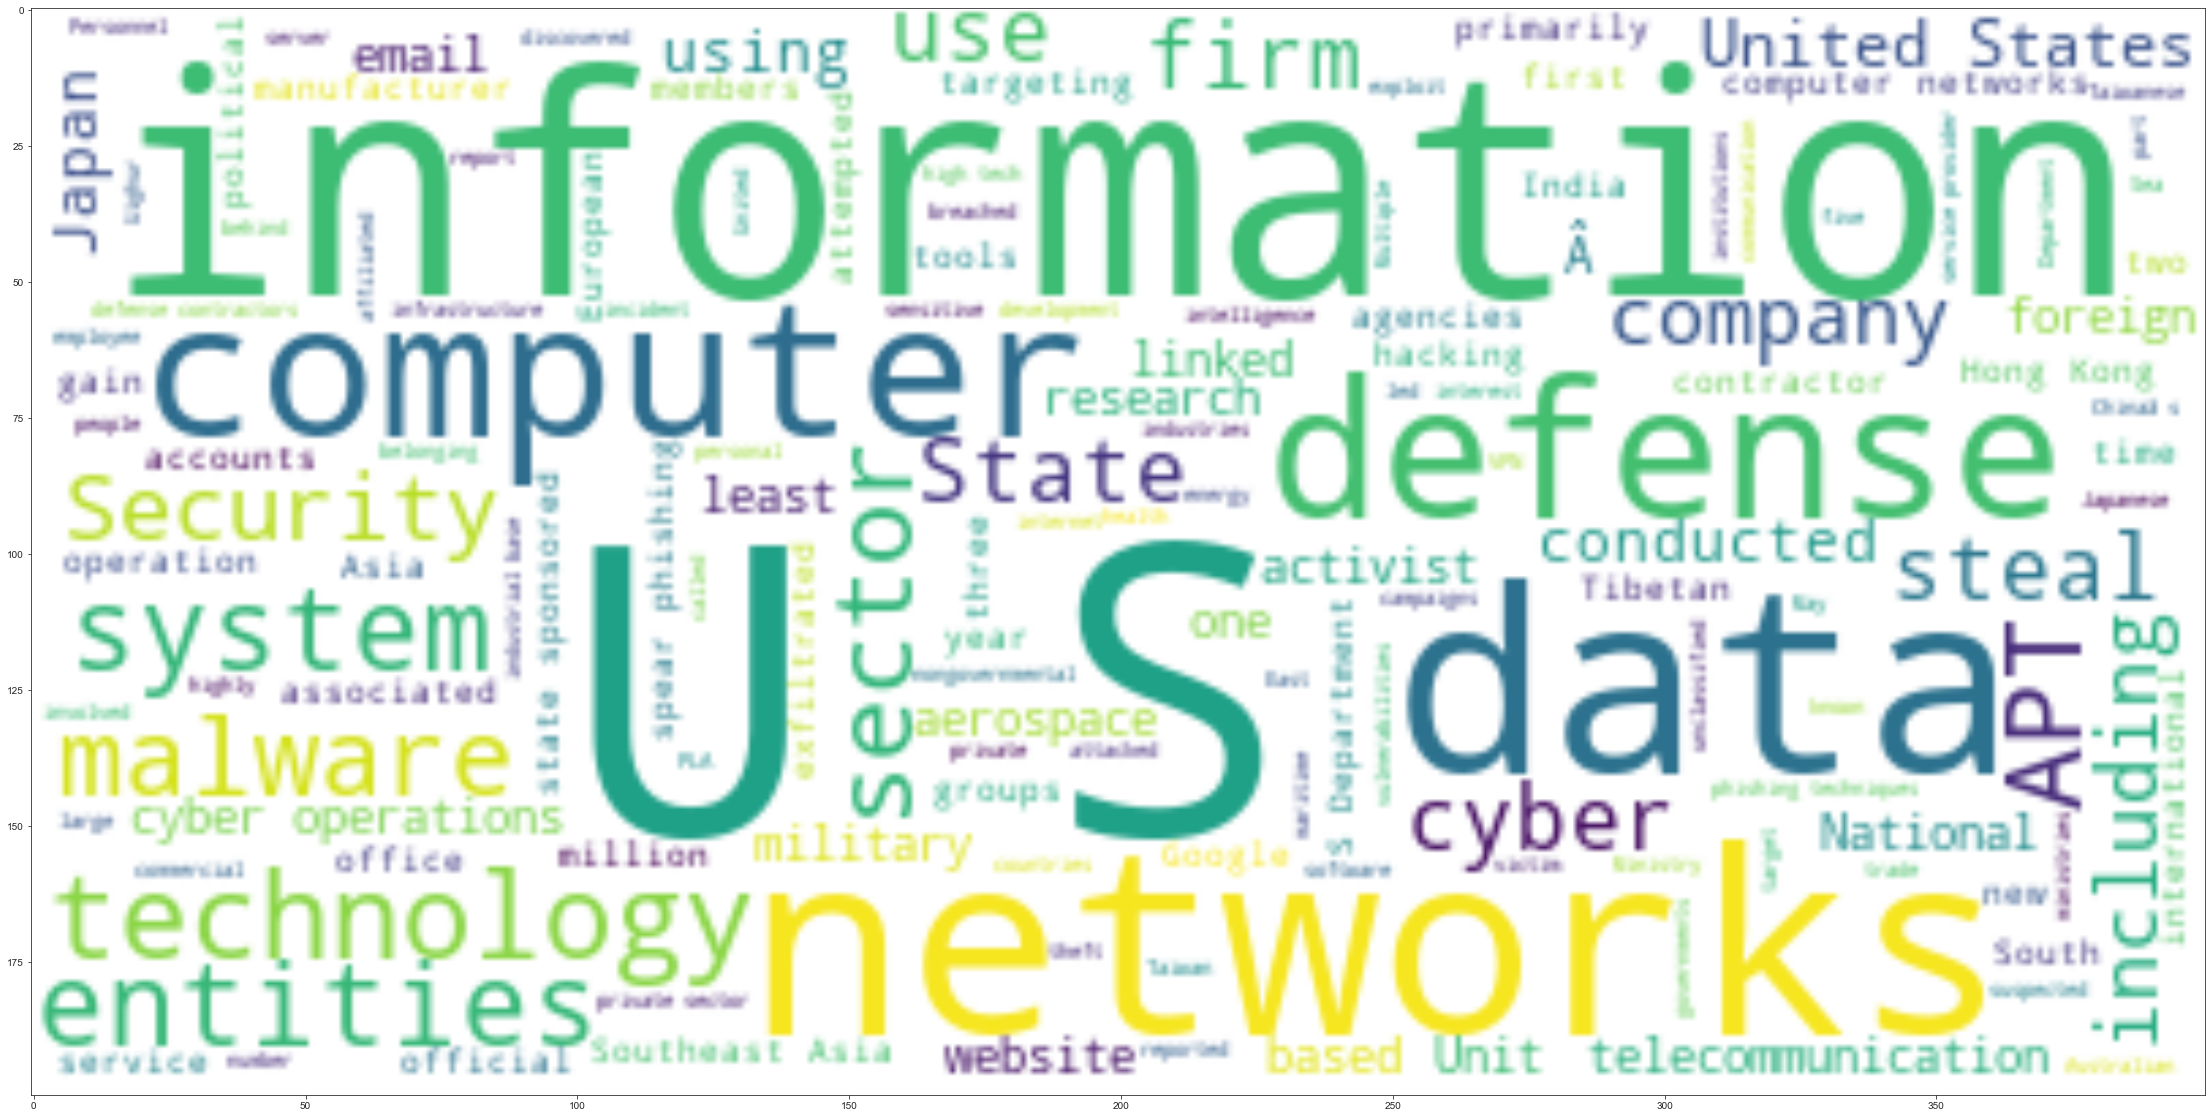

<Figure size 432x288 with 0 Axes>

In [16]:
#Filter dataset for only China related attacks
df_China = df3[df3.Sponsor == 'China']
df_China =df_China.Description


text = " ".join(review for review in df_China.astype(str))
print("There are {} words in the combination of all cells in column Description.".format(len(text)))

#extract standard stopwords 
stopwords = set(STOPWORDS)

#extract unrelated words
stopwords.update(["threat", "actor", "targets", "hackers", "network","attack", 'targeted', "companies", "aligned"
                  , "access", "threat actor","tool","used","organization","campaign","several","espionage",
                  "espionage purposes", "actor compromised","group","compromised","government","China","Chinese",
                  "compromise","actors","organizations","purpose","purposes","believed","attacks","compromises", 
                  "related"])

wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)

plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=-5)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
plt.savefig("13-wordcloud_china.png")

#### Wordcloud On Unknown Attack Description
can see from large words that attacks from unknown sources related to stealing of information on defence, technology, personal by deploying malware, phishing email or attacking through network

There are 8540 words in the combination of all cells in column Description.


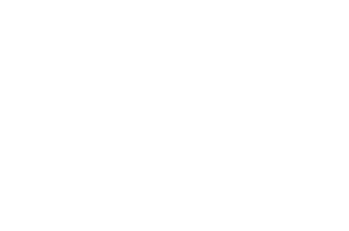

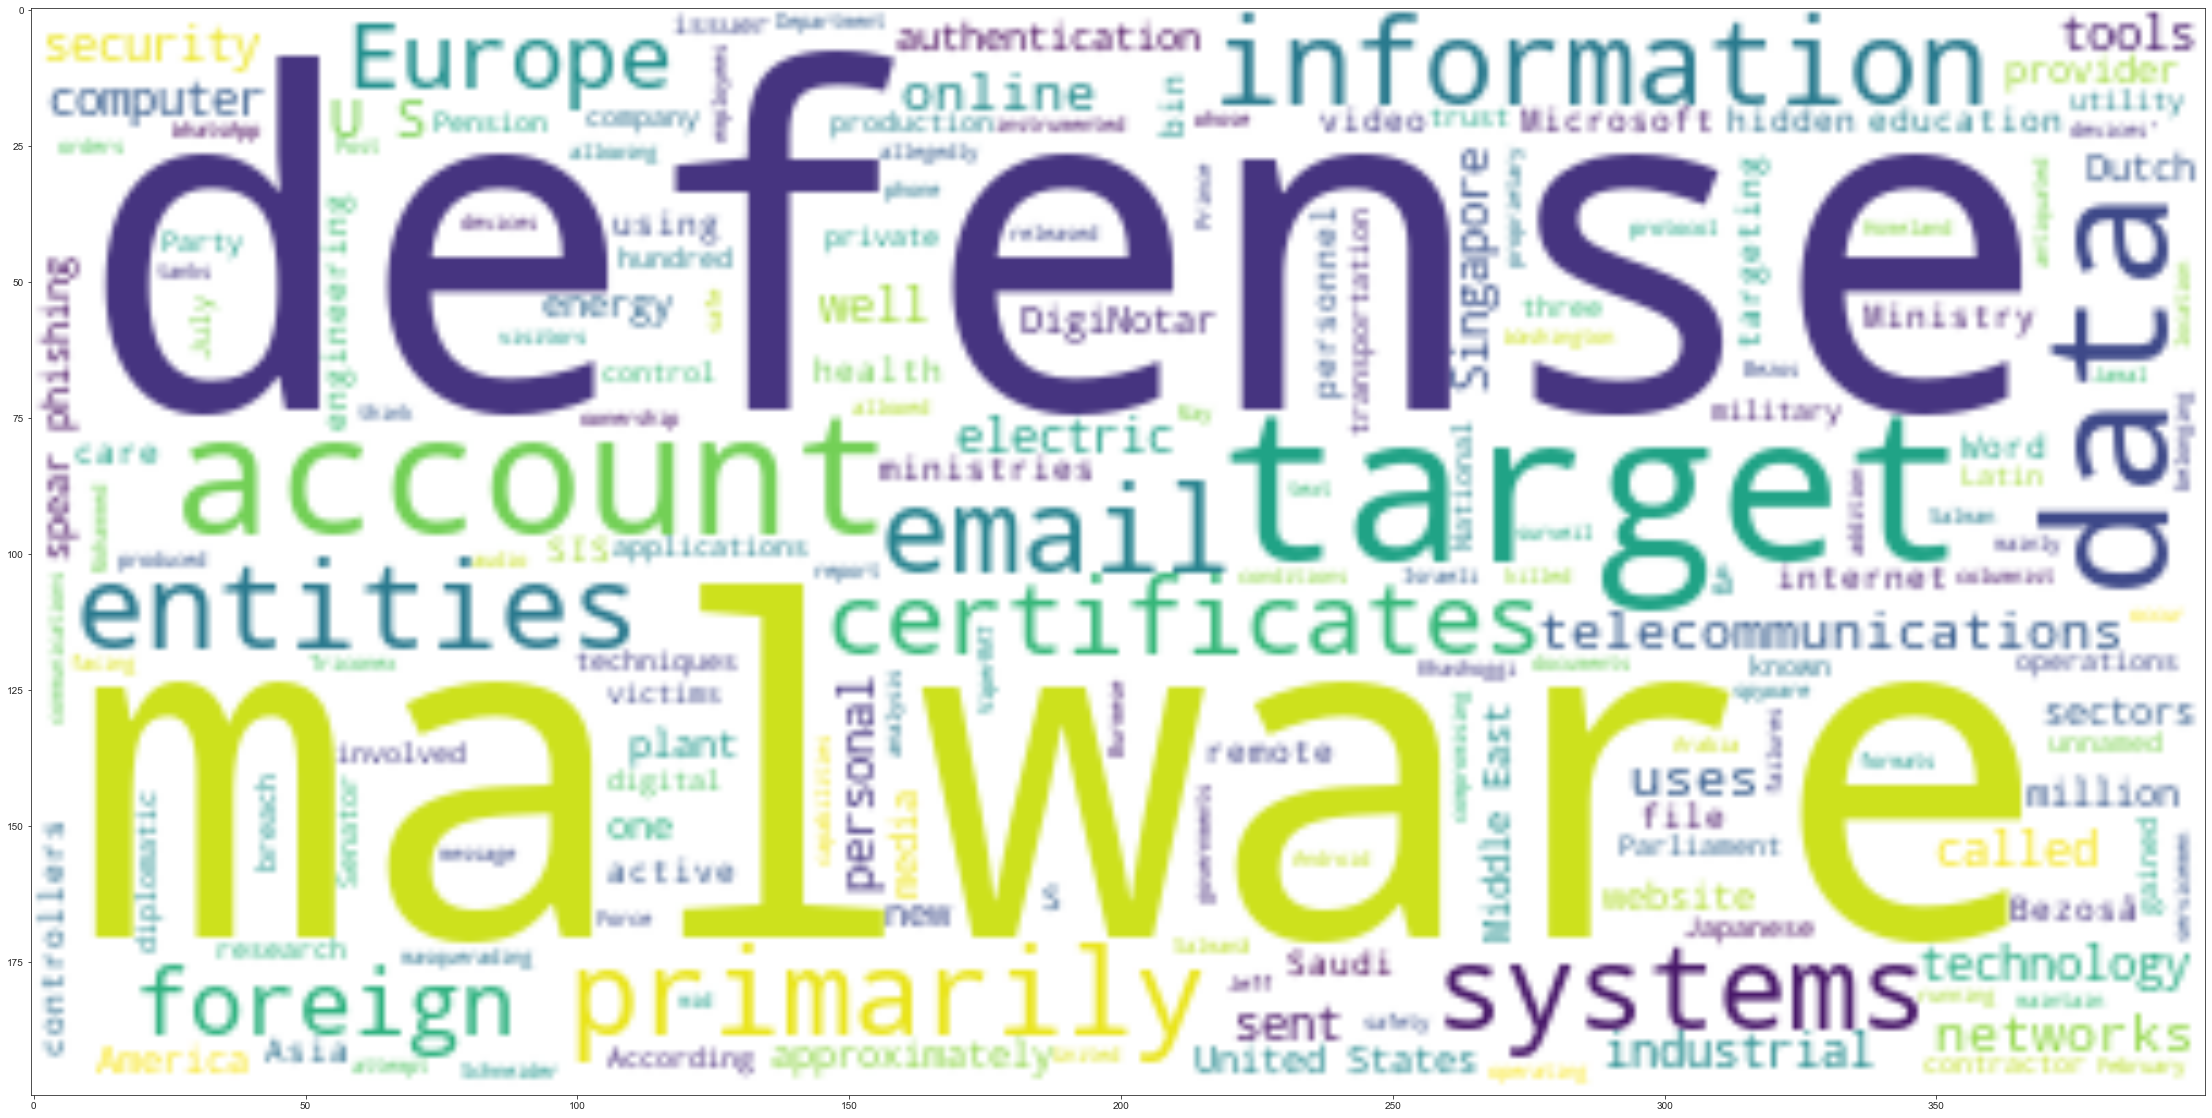

<Figure size 432x288 with 0 Axes>

In [17]:
#Filter dataset for only Unknown related attacks
df_Unknown = df3[df3.Sponsor == 'Unknown']
df_Unknown =df_Unknown.Description

text = " ".join(review for review in df_Unknown.astype(str))
print("There are {} words in the combination of all cells in column Description.".format(len(text)))

#extract standard stopwords 
stopwords = set(STOPWORDS)

#extract unrelated words
stopwords.update(["threat", "actor", "targets", "hackers", "network","attack", 'targeted', "companies", "aligned"
                  , "access", "threat actor","tool","used","organization","campaign","several","espionage",
                  "espionage purposes", "actor compromised","group","compromised","government","China","Chinese",
                  "compromise","actors","organizations","purpose","purposes","believed","attacks","compromises", 
                  "related","sector","system","certificate"])

wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)

plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=-5)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
plt.savefig("14-wordcloud_unknown.png")